<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
from sklearn.metrics import r2_score

Using TensorFlow backend.


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes=load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Prepare input data

In [4]:
from keras.utils import np_utils

In [5]:
# insert code here
# Prepare input data
# input
X = diabetes.data
n_cols = X.shape[1]

# output
y = diabetes.target



In [6]:
n_cols

10

### Split the data (training/test)

In [7]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 42)

### Create the model's architecture

In [8]:
# insert code here
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(25, activation = 'relu'))
#model.add(Flatten())
# Add the output layer
model.add(Dense(1, activation = 'linear'))

### Compile the model

In [9]:
# insert code here

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mean_squared_error'])


### Fit the training data

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
%%time
# insert code here
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    #batch_size = 100,
    epochs = 1000,
    verbose = 0)

Wall time: 30.7 s


### Create predictions

In [12]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [13]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print( score[0])

133/133 [==============================] - 0s 15us/step
2918.7041015625


In [14]:
model.history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

### Visualisation of cost

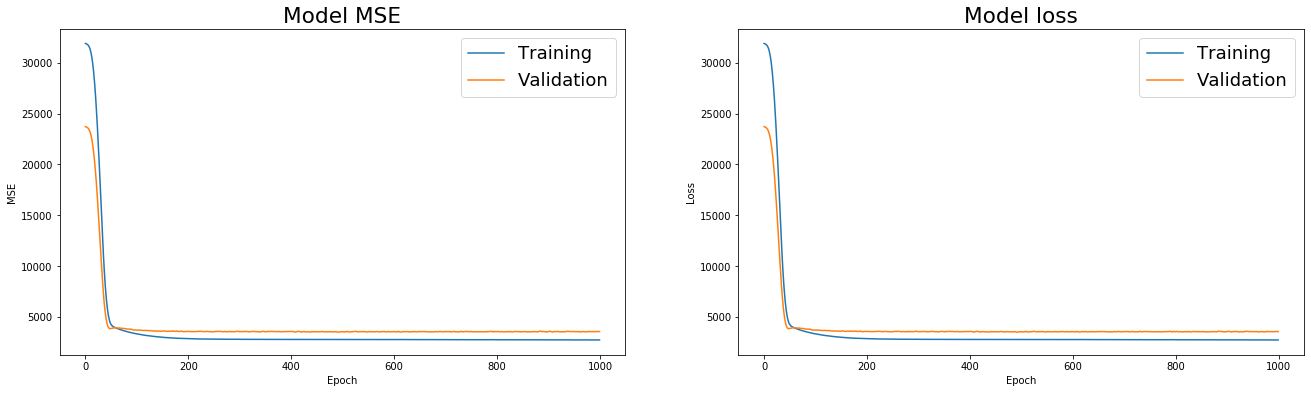

In [15]:

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['mean_squared_error'], label = 'Training')
ax[0].plot(model.history.history['val_mean_squared_error'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()


### Visualisation of residuals

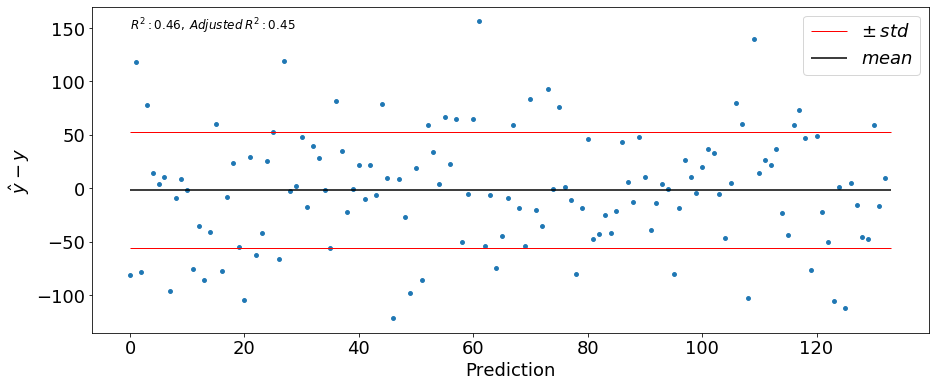

In [16]:
# insert code here
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



